Link to colab: https://colab.research.google.com/drive/1eeFUyJRzidfnxreYAxVz5SCyxC8PCHDW?usp=sharing

In [ ]:
# !wget -O boards_ccrl_3of4.tar 'https://drive.google.com/u/0/uc?id=1CMDXA7OHmK-ZzLkhXV372bV5keVutFeZ&confirm=t'
# !tar -xf boards_ccrl_3of4.tar
# !mv boards_ccrl data

In [ ]:
# !wget -O boards_ccrl_1of4.tar 'https://drive.google.com/u/0/uc?id=1wjQfjg8Wee-jVY0gb5L_XXpxCFnc3l_P&confirm=t'
# !tar -xf boards_ccrl_1of4.tar

# !wget -O boards_ccrl_2of4.tar 'https://drive.google.com/u/0/uc?id=1WPJgujT75pQFi-WrI2sZIemBBuPJjZSd&confirm=t'
# !tar -xf boards_ccrl_2of4.tar

# !wget -O boards_ccrl_3of4.tar 'https://drive.google.com/u/0/uc?id=1CMDXA7OHmK-ZzLkhXV372bV5keVutFeZ&confirm=t'
# !tar -xf boards_ccrl_3of4.tar

# !wget -O boards_ccrl_4of4.tar 'https://drive.google.com/u/0/uc?id=1-6VPabZRFnvz-aHJ43TAMuufSIuh4-d4&confirm=t'
# !tar -xf boards_ccrl_4of4.tar

!wget -O boards_hq_75k.tar 'https://drive.google.com/u/0/uc?id=1pRSmkge5DHocNz3rZCjFek38YFO8-Ze5&confirm=t'
!tar -xf boards_hq_75k.tar

# !mv boards_ccrl data
!mv boards_hq data_2
!pip install chess

--2023-05-22 08:18:03--  https://drive.google.com/u/0/uc?id=1pRSmkge5DHocNz3rZCjFek38YFO8-Ze5&confirm=t
Resolving drive.google.com (drive.google.com)... 142.251.12.113, 142.251.12.138, 142.251.12.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.12.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1pRSmkge5DHocNz3rZCjFek38YFO8-Ze5&confirm=t [following]
--2023-05-22 08:18:03--  https://drive.google.com/uc?id=1pRSmkge5DHocNz3rZCjFek38YFO8-Ze5&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tot99s2k1qpd8chak7no28mkrgbifqgs/1684743450000/18334911380517025247/*/1pRSmkge5DHocNz3rZCjFek38YFO8-Ze5?uuid=2b78a232-104f-47ce-b480-6afc7a6e1f54 [following]
--2023-05-22 08:18:04--  https://doc-0s-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7

In [ ]:
#@title Setup - Get ChessGNN repo (wait until session restarts)
def get_repo_and_install():
    import subprocess

    assert subprocess.getstatusoutput(f"git clone --depth=1 https://github.com/marcinz99/ChessGNN.git")[0] == 0
    assert subprocess.getstatusoutput(f"pip install -e ChessGNN/")[0] == 0
    exit()

get_repo_and_install()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ChessGNN
!git remote set-branches --add origin task-6_paste_code_from_notebooks
!git fetch origin task-6_paste_code_from_notebooks:task-6_paste_code_from_notebooks
!git checkout task-6_paste_code_from_notebooks
!git branch --set-upstream-to=origin/task-6_paste_code_from_notebooks task-6_paste_code_from_notebooks
!git pull
%cd ..

/content/ChessGNN
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 67 (delta 35), reused 51 (delta 19), pack-reused 0
Unpacking objects: 100% (67/67), 14.04 KiB | 898.00 KiB/s, done.
From https://github.com/marcinz99/ChessGNN
 * [new branch]      task-6_paste_code_from_notebooks -> task-6_paste_code_from_notebooks
 * [new branch]      task-6_paste_code_from_notebooks -> origin/task-6_paste_code_from_notebooks
Switched to branch 'task-6_paste_code_from_notebooks'
Branch 'task-6_paste_code_from_notebooks' set up to track remote branch 'task-6_paste_code_from_notebooks' from 'origin'.
Already up to date.
/content


In [ ]:
!cd ChessGNN; git pull

Already up to date.


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import subprocess
import chess
import os
import gc
import itertools
from tensorflow.data import Dataset
from chessgnn.graphchess.data_ingestion import get_dataset, select_targets, get_squarewise_features, prepare_features
from chessgnn.graphchess.architecture import input_block, full_block, regular_mlp_head, softmax_mlp_head
from chessgnn.graphchess.helpers import load_model

pd.set_option('display.max_columns', None)
plt.rcParams['figure.dpi'] = 72
DRIVE_PATH = "/content/drive/MyDrive/Praca magisterska/Colabs 4 - Final work/Models2/"

def run_cmd(cmd):
    subprocess.check_output([cmd], shell=True)

[0.98       0.974375   0.95750004 0.929375   0.89       0.839375
 0.77750003 0.70437497 0.62       0.52437496 0.41750002 0.29937494
 0.16999996 0.02937496 0.         0.        ]


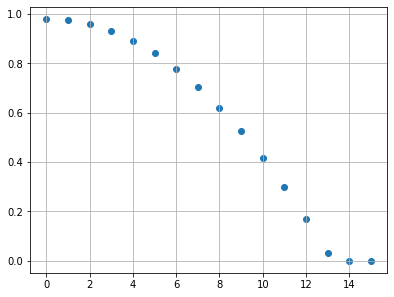

In [ ]:
@tf.function
def filter_by_ply_counts(x):
    return tf.maximum(0.0, 0.98 - tf.pow(0.075 * tf.cast(x, dtype=tf.float32), 2))


plt.scatter(np.arange(16), filter_by_ply_counts(np.arange(16)))
plt.grid()
print(filter_by_ply_counts(np.arange(16)).numpy())

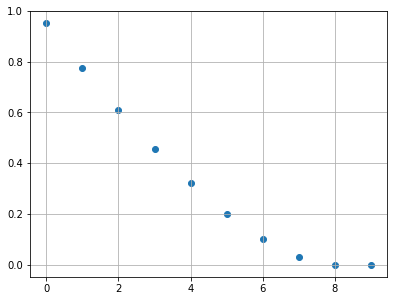

In [ ]:
@tf.function
def filter_by_ply_counts(x):
    return tf.pow(tf.maximum(8 - tf.cast(x, dtype=tf.float32) - 0.25, 0) / 8, 1.5)


plt.scatter(np.arange(10), filter_by_ply_counts(np.arange(10)))
plt.grid()

In [ ]:
all_stats = [
    'loss', 'checked_in_1_loss', 'checked_in_3_loss', 'checking_in_1_loss', 'checking_in_3_loss',
    'final_result_loss', 'legal_captures_loss', 'legal_moves_loss', 'next_move_loss',
    'next_pieces_captured_loss', 'next_pieces_moved_loss', 'plies_till_end_loss',
    'checked_in_1_precision', 'checked_in_1_recall', 'checked_in_3_precision', 'checked_in_3_recall',
    'checking_in_1_precision', 'checking_in_1_recall', 'checking_in_3_precision', 'checking_in_3_recall',
    'final_result_accuracy', 'legal_captures_mae', 'legal_moves_mae',
    'next_move_accuracy', 'next_move_top_2_accuracy', 'next_move_top_3_accuracy', 'next_move_top_5_accuracy',
    'next_move_top_10_accuracy', 'next_pieces_captured_mae', 'next_pieces_moved_mae', 'plies_till_end_mae'
 ]


def train_and_save(model, set_num, targets, n_sample, logfile=None, drop_duplicates=0):
    data_path = f'data_2/boards_{(set_num - 1) * 2500 :0>7}.parquet'
    print(f"Epoch {set_num} (reading games from: {data_path})\n")

    if drop_duplicates > 0:
        ds = get_dataset(data_file_path=data_path, shuffle=True, drop_duplicates=drop_duplicates)
    else:
        ds = get_dataset(data_file_path=data_path, shuffle=True)
        ds = ds.filter(lambda x: filter_by_ply_counts(x['ply_counter']) < tf.random.uniform([]))  # Filter out openings
    ds = ds.map(prepare_features)
    ds = ds.batch(1)

    history = model.fit((
        ds
        .map(select_targets(
            input_list=['pos_feats', 'glob_feats', 'coo_graph', 'legal_moves'],
            target_list=targets))
        .take(n_sample)
        .prefetch(100)
    ))
    gc.collect()

    model.save(f"graphchess_{set_num}.h5")
    run_cmd(f'cp graphchess_{set_num}.h5 "{DRIVE_PATH}"')

    if logfile:
        logs = pd.read_parquet(DRIVE_PATH + logfile)

        new_entry = pd.DataFrame(history.history, columns=all_stats)
        new_entry['episode'] = set_num

        logs = pd.concat([logs, new_entry], axis='rows').sort_values('episode').reset_index(drop=True)
        logs.to_parquet(logfile)
        run_cmd(f'cp {logfile} "{DRIVE_PATH}"')

## Load model

In [ ]:
model_ver = 26
run_cmd(f'cp "{DRIVE_PATH}graphchess_{model_ver}.h5" .')
model = load_model(f"graphchess_{model_ver}.h5")

In [ ]:
# def init_new_empty_logfile(name):
#     pd.DataFrame().to_parquet(name)
#     run_cmd(f'cp {name} "{DRIVE_PATH}"')

# init_new_empty_logfile('logs2.parquet')

## Training

### 0-50k

In [ ]:
model.compile(
    loss={
        'next_pieces_moved': 'mse',
        'next_pieces_captured': 'mse',
        'next_move': 'categorical_crossentropy',
        'plies_till_end': 'mse',
        'final_result': 'categorical_crossentropy',
    },
    optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-5),
    metrics={
        'next_pieces_moved': ['mae'],
        'next_pieces_captured': ['mae'],
        'next_move': [
            'accuracy',
            tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),
            tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy'),
            tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
            tf.keras.metrics.TopKCategoricalAccuracy(k=10, name='top_10_accuracy'),
        ],
        'plies_till_end': ['mae'],
        'final_result': ['accuracy'],
    },
)

In [ ]:
train_and_save(
    model=model, set_num=1,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=30000, logfile='logs2.parquet')

Epoch 1 (reading games from: data_2/boards_0000000.parquet)

20000/20000 [==============================] - 1724s 83ms/step - loss: 3.6344 - final_result_loss: 0.9720 - next_move_loss: 2.5448 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0618 - plies_till_end_loss: 0.0299 - final_result_accuracy: 0.5080 - next_move_accuracy: 0.2764 - next_move_top_2_accuracy: 0.4071 - next_move_top_3_accuracy: 0.4881 - next_move_top_5_accuracy: 0.6035 - next_move_top_10_accuracy: 0.7775 - next_pieces_captured_mae: 0.0564 - next_pieces_moved_mae: 0.1318 - plies_till_end_mae: 0.0944


In [ ]:
train_and_save(
    model=model, set_num=2,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=30000, logfile='logs2.parquet')

Epoch 2 (reading games from: data_2/boards_0002500.parquet)

20000/20000 [==============================] - 1723s 86ms/step - loss: 3.6292 - final_result_loss: 0.9797 - next_move_loss: 2.5314 - next_pieces_captured_loss: 0.0261 - next_pieces_moved_loss: 0.0625 - plies_till_end_loss: 0.0296 - final_result_accuracy: 0.4943 - next_move_accuracy: 0.2812 - next_move_top_2_accuracy: 0.4155 - next_move_top_3_accuracy: 0.4990 - next_move_top_5_accuracy: 0.6133 - next_move_top_10_accuracy: 0.7851 - next_pieces_captured_mae: 0.0566 - next_pieces_moved_mae: 0.1331 - plies_till_end_mae: 0.0927


In [ ]:
train_and_save(
    model=model, set_num=3,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=30000, logfile='logs2.parquet')

Epoch 3 (reading games from: data_2/boards_0005000.parquet)

30000/30000 [==============================] - 2562s 85ms/step - loss: 3.6227 - final_result_loss: 0.9739 - next_move_loss: 2.5300 - next_pieces_captured_loss: 0.0261 - next_pieces_moved_loss: 0.0620 - plies_till_end_loss: 0.0308 - final_result_accuracy: 0.4970 - next_move_accuracy: 0.2810 - next_move_top_2_accuracy: 0.4151 - next_move_top_3_accuracy: 0.4962 - next_move_top_5_accuracy: 0.6109 - next_move_top_10_accuracy: 0.7806 - next_pieces_captured_mae: 0.0568 - next_pieces_moved_mae: 0.1322 - plies_till_end_mae: 0.0946


In [ ]:
train_and_save(
    model=model, set_num=4,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=30000, logfile='logs2.parquet')

Epoch 4 (reading games from: data_2/boards_0007500.parquet)

30000/30000 [==============================] - 2602s 87ms/step - loss: 3.6284 - final_result_loss: 0.9833 - next_move_loss: 2.5262 - next_pieces_captured_loss: 0.0258 - next_pieces_moved_loss: 0.0624 - plies_till_end_loss: 0.0306 - final_result_accuracy: 0.4929 - next_move_accuracy: 0.2800 - next_move_top_2_accuracy: 0.4088 - next_move_top_3_accuracy: 0.4950 - next_move_top_5_accuracy: 0.6124 - next_move_top_10_accuracy: 0.7864 - next_pieces_captured_mae: 0.0563 - next_pieces_moved_mae: 0.1328 - plies_till_end_mae: 0.0954


In [ ]:
train_and_save(
    model=model, set_num=5,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 5 (reading games from: data_2/boards_0010000.parquet)

50000/50000 [==============================] - 4462s 89ms/step - loss: 3.6114 - final_result_loss: 0.9831 - next_move_loss: 2.5106 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0620 - plies_till_end_loss: 0.0299 - final_result_accuracy: 0.4942 - next_move_accuracy: 0.2845 - next_move_top_2_accuracy: 0.4179 - next_move_top_3_accuracy: 0.5045 - next_move_top_5_accuracy: 0.6203 - next_move_top_10_accuracy: 0.7871 - next_pieces_captured_mae: 0.0564 - next_pieces_moved_mae: 0.1319 - plies_till_end_mae: 0.0940


In [ ]:
train_and_save(
    model=model, set_num=6,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 6 (reading games from: data_2/boards_0012500.parquet)

50000/50000 [==============================] - 4450s 89ms/step - loss: 3.6036 - final_result_loss: 0.9755 - next_move_loss: 2.5109 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0616 - plies_till_end_loss: 0.0297 - final_result_accuracy: 0.5004 - next_move_accuracy: 0.2829 - next_move_top_2_accuracy: 0.4139 - next_move_top_3_accuracy: 0.5000 - next_move_top_5_accuracy: 0.6172 - next_move_top_10_accuracy: 0.7877 - next_pieces_captured_mae: 0.0563 - next_pieces_moved_mae: 0.1313 - plies_till_end_mae: 0.0929


In [ ]:
train_and_save(
    model=model, set_num=7,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 7 (reading games from: data_2/boards_0015000.parquet)

50000/50000 [==============================] - 4392s 86ms/step - loss: 3.5816 - final_result_loss: 0.9677 - next_move_loss: 2.4956 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0623 - plies_till_end_loss: 0.0302 - final_result_accuracy: 0.5069 - next_move_accuracy: 0.2898 - next_move_top_2_accuracy: 0.4203 - next_move_top_3_accuracy: 0.5079 - next_move_top_5_accuracy: 0.6214 - next_move_top_10_accuracy: 0.7904 - next_pieces_captured_mae: 0.0563 - next_pieces_moved_mae: 0.1324 - plies_till_end_mae: 0.0944


In [ ]:
train_and_save(
    model=model, set_num=8,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 8 (reading games from: data_2/boards_0017500.parquet)

50000/50000 [==============================] - 4365s 87ms/step - loss: 3.5852 - final_result_loss: 0.9668 - next_move_loss: 2.5021 - next_pieces_captured_loss: 0.0257 - next_pieces_moved_loss: 0.0615 - plies_till_end_loss: 0.0290 - final_result_accuracy: 0.5091 - next_move_accuracy: 0.2867 - next_move_top_2_accuracy: 0.4186 - next_move_top_3_accuracy: 0.5034 - next_move_top_5_accuracy: 0.6202 - next_move_top_10_accuracy: 0.7905 - next_pieces_captured_mae: 0.0560 - next_pieces_moved_mae: 0.1307 - plies_till_end_mae: 0.0920


In [ ]:
train_and_save(
    model=model, set_num=9,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 9 (reading games from: data_2/boards_0020000.parquet)

  31159/Unknown - 2858s 92ms/step - loss: 3.5707 - final_result_loss: 0.9783 - next_move_loss: 2.4748 - next_pieces_captured_loss: 0.0257 - next_pieces_moved_loss: 0.0617 - plies_till_end_loss: 0.0302 - final_result_accuracy: 0.4987 - next_move_accuracy: 0.2926 - next_move_top_2_accuracy: 0.4277 - next_move_top_3_accuracy: 0.5121 - next_move_top_5_accuracy: 0.6273 - next_move_top_10_accuracy: 0.7963 - next_pieces_captured_mae: 0.0562 - next_pieces_moved_mae: 0.1311 - plies_till_end_mae: 0.0947

In [ ]:
train_and_save(
    model=model, set_num=10,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 10 (reading games from: data_2/boards_0022500.parquet)

50000/50000 [==============================] - 4578s 90ms/step - loss: 3.5668 - final_result_loss: 0.9545 - next_move_loss: 2.4947 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0617 - plies_till_end_loss: 0.0302 - final_result_accuracy: 0.5125 - next_move_accuracy: 0.2849 - next_move_top_2_accuracy: 0.4222 - next_move_top_3_accuracy: 0.5091 - next_move_top_5_accuracy: 0.6265 - next_move_top_10_accuracy: 0.7954 - next_pieces_captured_mae: 0.0559 - next_pieces_moved_mae: 0.1310 - plies_till_end_mae: 0.0953


In [ ]:
train_and_save(
    model=model, set_num=11,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 11 (reading games from: data_2/boards_0025000.parquet)

50000/50000 [==============================] - 4479s 90ms/step - loss: 3.5703 - final_result_loss: 0.9641 - next_move_loss: 2.4879 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0621 - plies_till_end_loss: 0.0303 - final_result_accuracy: 0.5099 - next_move_accuracy: 0.2910 - next_move_top_2_accuracy: 0.4256 - next_move_top_3_accuracy: 0.5099 - next_move_top_5_accuracy: 0.6249 - next_move_top_10_accuracy: 0.7965 - next_pieces_captured_mae: 0.0563 - next_pieces_moved_mae: 0.1316 - plies_till_end_mae: 0.0952


In [ ]:
train_and_save(
    model=model, set_num=12,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 12 (reading games from: data_2/boards_0027500.parquet)

50000/50000 [==============================] - 4183s 84ms/step - loss: 3.5618 - final_result_loss: 0.9629 - next_move_loss: 2.4818 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0616 - plies_till_end_loss: 0.0300 - final_result_accuracy: 0.5113 - next_move_accuracy: 0.2914 - next_move_top_2_accuracy: 0.4246 - next_move_top_3_accuracy: 0.5118 - next_move_top_5_accuracy: 0.6290 - next_move_top_10_accuracy: 0.7964 - next_pieces_captured_mae: 0.0555 - next_pieces_moved_mae: 0.1305 - plies_till_end_mae: 0.0950


In [ ]:
train_and_save(
    model=model, set_num=13,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 13 (reading games from: data_2/boards_0030000.parquet)

50000/50000 [==============================] - 4485s 88ms/step - loss: 3.5482 - final_result_loss: 0.9645 - next_move_loss: 2.4665 - next_pieces_captured_loss: 0.0261 - next_pieces_moved_loss: 0.0617 - plies_till_end_loss: 0.0294 - final_result_accuracy: 0.5088 - next_move_accuracy: 0.2922 - next_move_top_2_accuracy: 0.4287 - next_move_top_3_accuracy: 0.5161 - next_move_top_5_accuracy: 0.6318 - next_move_top_10_accuracy: 0.7983 - next_pieces_captured_mae: 0.0567 - next_pieces_moved_mae: 0.1306 - plies_till_end_mae: 0.0916


In [ ]:
train_and_save(
    model=model, set_num=14,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 14 (reading games from: data_2/boards_0032500.parquet)

50000/50000 [==============================] - 4483s 88ms/step - loss: 3.5390 - final_result_loss: 0.9652 - next_move_loss: 2.4564 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0620 - plies_till_end_loss: 0.0296 - final_result_accuracy: 0.5145 - next_move_accuracy: 0.2957 - next_move_top_2_accuracy: 0.4328 - next_move_top_3_accuracy: 0.5183 - next_move_top_5_accuracy: 0.6343 - next_move_top_10_accuracy: 0.8035 - next_pieces_captured_mae: 0.0560 - next_pieces_moved_mae: 0.1308 - plies_till_end_mae: 0.0943


In [ ]:
train_and_save(
    model=model, set_num=15,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 15 (reading games from: data_2/boards_0035000.parquet)

50000/50000 [==============================] - 4464s 88ms/step - loss: 3.5354 - final_result_loss: 0.9518 - next_move_loss: 2.4666 - next_pieces_captured_loss: 0.0259 - next_pieces_moved_loss: 0.0618 - plies_till_end_loss: 0.0293 - final_result_accuracy: 0.5164 - next_move_accuracy: 0.2923 - next_move_top_2_accuracy: 0.4293 - next_move_top_3_accuracy: 0.5151 - next_move_top_5_accuracy: 0.6331 - next_move_top_10_accuracy: 0.8001 - next_pieces_captured_mae: 0.0563 - next_pieces_moved_mae: 0.1305 - plies_till_end_mae: 0.0930


In [ ]:
train_and_save(
    model=model, set_num=16,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 16 (reading games from: data_2/boards_0037500.parquet)

50000/50000 [==============================] - 4437s 87ms/step - loss: 3.5270 - final_result_loss: 0.9448 - next_move_loss: 2.4655 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0610 - plies_till_end_loss: 0.0301 - final_result_accuracy: 0.5269 - next_move_accuracy: 0.2936 - next_move_top_2_accuracy: 0.4269 - next_move_top_3_accuracy: 0.5136 - next_move_top_5_accuracy: 0.6298 - next_move_top_10_accuracy: 0.7999 - next_pieces_captured_mae: 0.0558 - next_pieces_moved_mae: 0.1288 - plies_till_end_mae: 0.0942


In [ ]:
train_and_save(
    model=model, set_num=17,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 17 (reading games from: data_2/boards_0040000.parquet)

50000/50000 [==============================] - 4325s 85ms/step - loss: 3.5379 - final_result_loss: 0.9627 - next_move_loss: 2.4584 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0617 - plies_till_end_loss: 0.0294 - final_result_accuracy: 0.5122 - next_move_accuracy: 0.2951 - next_move_top_2_accuracy: 0.4325 - next_move_top_3_accuracy: 0.5182 - next_move_top_5_accuracy: 0.6353 - next_move_top_10_accuracy: 0.8001 - next_pieces_captured_mae: 0.0558 - next_pieces_moved_mae: 0.1302 - plies_till_end_mae: 0.0932


In [ ]:
train_and_save(
    model=model, set_num=18,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 18 (reading games from: data_2/boards_0042500.parquet)

50000/50000 [==============================] - 4558s 90ms/step - loss: 3.5149 - final_result_loss: 0.9493 - next_move_loss: 2.4484 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0616 - plies_till_end_loss: 0.0300 - final_result_accuracy: 0.5208 - next_move_accuracy: 0.2969 - next_move_top_2_accuracy: 0.4335 - next_move_top_3_accuracy: 0.5211 - next_move_top_5_accuracy: 0.6375 - next_move_top_10_accuracy: 0.8036 - next_pieces_captured_mae: 0.0557 - next_pieces_moved_mae: 0.1296 - plies_till_end_mae: 0.0944


In [ ]:
train_and_save(
    model=model, set_num=19,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 19 (reading games from: data_2/boards_0045000.parquet)

50000/50000 [==============================] - 4216s 83ms/step - loss: 3.5303 - final_result_loss: 0.9586 - next_move_loss: 2.4553 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0611 - plies_till_end_loss: 0.0298 - final_result_accuracy: 0.5150 - next_move_accuracy: 0.2936 - next_move_top_2_accuracy: 0.4313 - next_move_top_3_accuracy: 0.5197 - next_move_top_5_accuracy: 0.6368 - next_move_top_10_accuracy: 0.8041 - next_pieces_captured_mae: 0.0556 - next_pieces_moved_mae: 0.1285 - plies_till_end_mae: 0.0940


In [ ]:
train_and_save(
    model=model, set_num=20,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 20 (reading games from: data_2/boards_0047500.parquet)

50000/50000 [==============================] - 4249s 84ms/step - loss: 3.4978 - final_result_loss: 0.9504 - next_move_loss: 2.4311 - next_pieces_captured_loss: 0.0258 - next_pieces_moved_loss: 0.0610 - plies_till_end_loss: 0.0296 - final_result_accuracy: 0.5211 - next_move_accuracy: 0.3000 - next_move_top_2_accuracy: 0.4401 - next_move_top_3_accuracy: 0.5255 - next_move_top_5_accuracy: 0.6416 - next_move_top_10_accuracy: 0.8070 - next_pieces_captured_mae: 0.0557 - next_pieces_moved_mae: 0.1281 - plies_till_end_mae: 0.0941


In [ ]:
train_and_save(
    model=model, set_num=21,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 21 (reading games from: data_2/boards_0050000.parquet)

50000/50000 [==============================] - 4276s 84ms/step - loss: 3.4842 - final_result_loss: 0.9463 - next_move_loss: 2.4214 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0610 - plies_till_end_loss: 0.0300 - final_result_accuracy: 0.5312 - next_move_accuracy: 0.3014 - next_move_top_2_accuracy: 0.4390 - next_move_top_3_accuracy: 0.5257 - next_move_top_5_accuracy: 0.6444 - next_move_top_10_accuracy: 0.8119 - next_pieces_captured_mae: 0.0552 - next_pieces_moved_mae: 0.1280 - plies_till_end_mae: 0.0940


In [ ]:
train_and_save(
    model=model, set_num=22,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 22 (reading games from: data_2/boards_0052500.parquet)

50000/50000 [==============================] - 4239s 84ms/step - loss: 3.4973 - final_result_loss: 0.9549 - next_move_loss: 2.4272 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0611 - plies_till_end_loss: 0.0286 - final_result_accuracy: 0.5170 - next_move_accuracy: 0.3001 - next_move_top_2_accuracy: 0.4410 - next_move_top_3_accuracy: 0.5283 - next_move_top_5_accuracy: 0.6435 - next_move_top_10_accuracy: 0.8091 - next_pieces_captured_mae: 0.0552 - next_pieces_moved_mae: 0.1281 - plies_till_end_mae: 0.0908


In [ ]:
train_and_save(
    model=model, set_num=23,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 23 (reading games from: data_2/boards_0055000.parquet)

50000/50000 [==============================] - 4262s 84ms/step - loss: 3.4691 - final_result_loss: 0.9434 - next_move_loss: 2.4098 - next_pieces_captured_loss: 0.0256 - next_pieces_moved_loss: 0.0609 - plies_till_end_loss: 0.0294 - final_result_accuracy: 0.5330 - next_move_accuracy: 0.3064 - next_move_top_2_accuracy: 0.4447 - next_move_top_3_accuracy: 0.5326 - next_move_top_5_accuracy: 0.6482 - next_move_top_10_accuracy: 0.8139 - next_pieces_captured_mae: 0.0553 - next_pieces_moved_mae: 0.1277 - plies_till_end_mae: 0.0934


In [ ]:
train_and_save(
    model=model, set_num=24,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 24 (reading games from: data_2/boards_0057500.parquet)

50000/50000 [==============================] - 4045s 80ms/step - loss: 3.4799 - final_result_loss: 0.9536 - next_move_loss: 2.4095 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0612 - plies_till_end_loss: 0.0302 - final_result_accuracy: 0.5215 - next_move_accuracy: 0.3044 - next_move_top_2_accuracy: 0.4435 - next_move_top_3_accuracy: 0.5308 - next_move_top_5_accuracy: 0.6486 - next_move_top_10_accuracy: 0.8150 - next_pieces_captured_mae: 0.0551 - next_pieces_moved_mae: 0.1283 - plies_till_end_mae: 0.0949


In [ ]:
train_and_save(
    model=model, set_num=25,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 25 (reading games from: data_2/boards_0060000.parquet)

50000/50000 [==============================] - 4531s 89ms/step - loss: 3.4895 - final_result_loss: 0.9612 - next_move_loss: 2.4139 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0605 - plies_till_end_loss: 0.0284 - final_result_accuracy: 0.5170 - next_move_accuracy: 0.3036 - next_move_top_2_accuracy: 0.4429 - next_move_top_3_accuracy: 0.5286 - next_move_top_5_accuracy: 0.6457 - next_move_top_10_accuracy: 0.8118 - next_pieces_captured_mae: 0.0552 - next_pieces_moved_mae: 0.1270 - plies_till_end_mae: 0.0904


In [ ]:
train_and_save(
    model=model, set_num=26,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 26 (reading games from: data_2/boards_0062500.parquet)

50000/50000 [==============================] - 4497s 89ms/step - loss: 3.4849 - final_result_loss: 0.9418 - next_move_loss: 2.4275 - next_pieces_captured_loss: 0.0257 - next_pieces_moved_loss: 0.0611 - plies_till_end_loss: 0.0289 - final_result_accuracy: 0.5314 - next_move_accuracy: 0.3000 - next_move_top_2_accuracy: 0.4361 - next_move_top_3_accuracy: 0.5260 - next_move_top_5_accuracy: 0.6417 - next_move_top_10_accuracy: 0.8093 - next_pieces_captured_mae: 0.0556 - next_pieces_moved_mae: 0.1278 - plies_till_end_mae: 0.0913


In [ ]:
train_and_save(
    model=model, set_num=27,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 27 (reading games from: data_2/boards_0065000.parquet)

50000/50000 [==============================] - 4273s 84ms/step - loss: 3.4630 - final_result_loss: 0.9419 - next_move_loss: 2.4041 - next_pieces_captured_loss: 0.0257 - next_pieces_moved_loss: 0.0616 - plies_till_end_loss: 0.0298 - final_result_accuracy: 0.5333 - next_move_accuracy: 0.3069 - next_move_top_2_accuracy: 0.4475 - next_move_top_3_accuracy: 0.5353 - next_move_top_5_accuracy: 0.6513 - next_move_top_10_accuracy: 0.8154 - next_pieces_captured_mae: 0.0554 - next_pieces_moved_mae: 0.1287 - plies_till_end_mae: 0.0940


In [ ]:
train_and_save(
    model=model, set_num=28,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 28 (reading games from: data_2/boards_0067500.parquet)

50000/50000 [==============================] - 4194s 83ms/step - loss: 3.4779 - final_result_loss: 0.9493 - next_move_loss: 2.4123 - next_pieces_captured_loss: 0.0254 - next_pieces_moved_loss: 0.0611 - plies_till_end_loss: 0.0298 - final_result_accuracy: 0.5260 - next_move_accuracy: 0.3015 - next_move_top_2_accuracy: 0.4395 - next_move_top_3_accuracy: 0.5296 - next_move_top_5_accuracy: 0.6474 - next_move_top_10_accuracy: 0.8141 - next_pieces_captured_mae: 0.0549 - next_pieces_moved_mae: 0.1277 - plies_till_end_mae: 0.0945


In [ ]:
train_and_save(
    model=model, set_num=29,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 29 (reading games from: data_2/boards_0070000.parquet)

50000/50000 [==============================] - 4205s 83ms/step - loss: 3.4651 - final_result_loss: 0.9429 - next_move_loss: 2.4070 - next_pieces_captured_loss: 0.0254 - next_pieces_moved_loss: 0.0606 - plies_till_end_loss: 0.0292 - final_result_accuracy: 0.5276 - next_move_accuracy: 0.3033 - next_move_top_2_accuracy: 0.4435 - next_move_top_3_accuracy: 0.5291 - next_move_top_5_accuracy: 0.6489 - next_move_top_10_accuracy: 0.8168 - next_pieces_captured_mae: 0.0548 - next_pieces_moved_mae: 0.1267 - plies_till_end_mae: 0.0923


In [ ]:
train_and_save(
    model=model, set_num=30,
    targets=['next_pieces_moved', 'next_pieces_captured', 'next_move', 'plies_till_end', 'final_result'],
    n_sample=50000, logfile='logs2.parquet')

Epoch 30 (reading games from: data_2/boards_0072500.parquet)

50000/50000 [==============================] - 4162s 83ms/step - loss: 3.4726 - final_result_loss: 0.9420 - next_move_loss: 2.4129 - next_pieces_captured_loss: 0.0255 - next_pieces_moved_loss: 0.0612 - plies_till_end_loss: 0.0309 - final_result_accuracy: 0.5317 - next_move_accuracy: 0.3035 - next_move_top_2_accuracy: 0.4435 - next_move_top_3_accuracy: 0.5290 - next_move_top_5_accuracy: 0.6451 - next_move_top_10_accuracy: 0.8131 - next_pieces_captured_mae: 0.0552 - next_pieces_moved_mae: 0.1279 - plies_till_end_mae: 0.0962


In [ ]:
logs = pd.read_parquet(DRIVE_PATH + 'logs2.parquet')
logs

,loss,checked_in_1_loss,checked_in_3_loss,checking_in_1_loss,checking_in_3_loss,final_result_loss,legal_captures_loss,legal_moves_loss,next_move_loss,next_pieces_captured_loss,next_pieces_moved_loss,plies_till_end_loss,checked_in_1_precision,checked_in_1_recall,checked_in_3_precision,checked_in_3_recall,checking_in_1_precision,checking_in_1_recall,checking_in_3_precision,checking_in_3_recall,final_result_accuracy,legal_captures_mae,legal_moves_mae,next_move_accuracy,next_move_top_2_accuracy,next_move_top_3_accuracy,next_move_top_5_accuracy,next_move_top_10_accuracy,next_pieces_captured_mae,next_pieces_moved_mae,plies_till_end_mae,episode
0,3.634403,None,None,None,None,0.972026,None,None,2.544820,0.025854,0.061787,0.029922,None,None,None,None,None,None,None,None,0.507950,None,None,0.276400,0.40710,0.488100,0.60350,0.777550,0.056361,0.131836,0.094355,1
1,3.629181,None,None,None,None,0.979686,None,None,2.531400,0.026054,0.062483,0.029557,None,None,None,None,None,None,None,None,0.494350,None,None,0.281200,0.41550,0.498950,0.61330,0.785100,0.056551,0.133076,0.092708,2
2,3.622719,None,None,None,None,0.973868,None,None,2.530015,0.026059,0.062011,0.030758,None,None,None,None,None,None,None,None,0.497033,None,None,0.281000,0.41510,0.496233,0.61090,0.780600,0.056827,0.132180,0.094621,3
3,3.628439,None,None,None,None,0.983346,None,None,2.526246,0.025836,0.062375,0.030648,None,None,None,None,None,None,None,None,0.492933,None,None,0.279967,0.40880,0.495033,0.61240,0.786367,0.056299,0.132839,0.095442,4
4,3.611427,None,None,None,None,0.983094,None,None,2.510560,0.025918,0.061966,0.029892,None,None,None,None,None,None,None,None,0.494200,None,None,0.284540,0.41794,0.504540,0.62030,0.787120,0.056378,0.131865,0.094002,5
5,3.603611,None,None,None,None,0.975458,None,None,2.510915,0.025876,0.061646,0.029705,None,None,None,None,None,None,None,None,0.500420,None,None,0.282940,0.41392,0.500000,0.61716,0.787740,0.056326,0.131318,0.092910,6
6,3.581644,None,None,None,None,0.967706,None,None,2.495613,0.025852,0.062266,0.030213,None,None,None,None,None,None,None,None,0.506900,None,None,0.289820,0.42030,0.507880,0.62136,0.790360,0.056305,0.132415,0.094445,7
7,3.585166,None,None,None,None,0.966814,None,None,2.502135,0.025729,0.061493,0.029008,None,None,None,None,None,None,None,None,0.509140,None,None,0.286740,0.41856,0.503440,0.62016,0.790520,0.056018,0.130697,0.091969,8
8,3.572171,None,None,None,None,0.979852,None,None,2.474863,0.025727,0.061792,0.029921,None,None,None,None,None,None,None,None,0.495860,None,None,0.292740,0.42816,0.512520,0.62780,0.796040,0.056136,0.131308,0.093580,9
9,3.566775,None,None,None,None,0.954536,None,None,2.494700,0.025635,0.061673,0.030242,None,None,None,None,None,None,None,None,0.512480,None,None,0.284860,0.42224,0.509120,0.62648,0.795400,0.055885,0.131049,0.095310,10


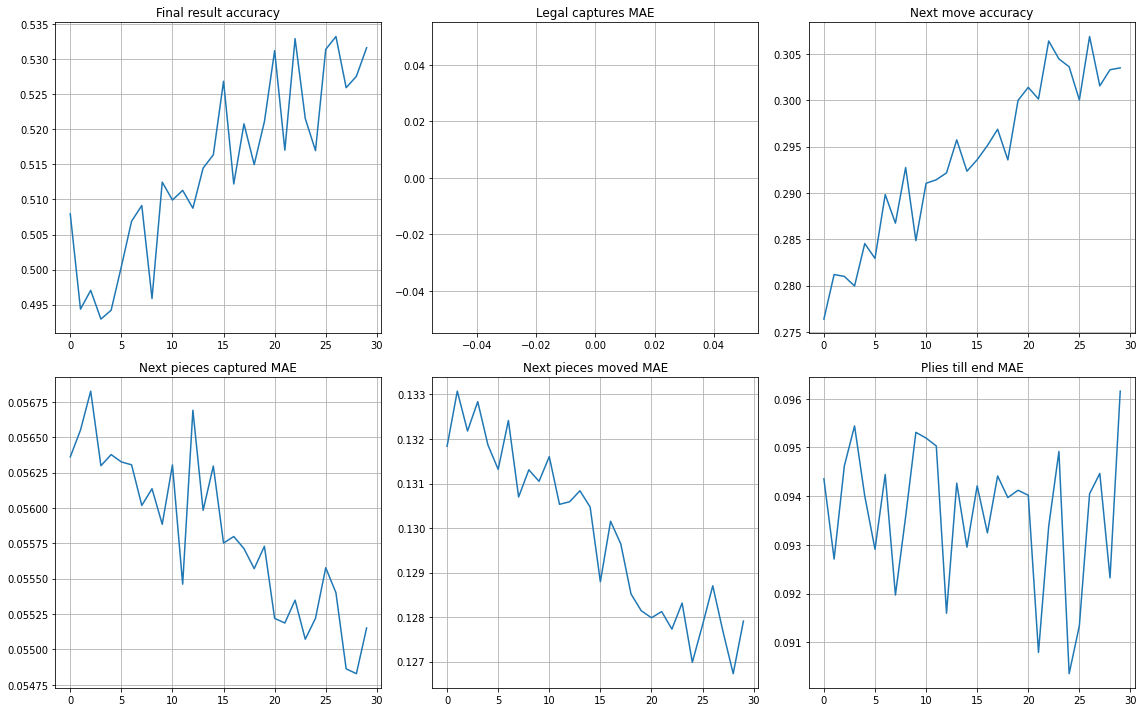

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
plt.title('Final result accuracy')
plt.plot(logs['final_result_accuracy'])
plt.grid()
plt.subplot(2, 3, 2)
plt.title('Legal captures MAE')
plt.plot(logs['legal_captures_mae'])
plt.grid()
plt.subplot(2, 3, 3)
plt.title('Next move accuracy')
plt.plot(logs['next_move_accuracy'])
plt.grid()
plt.subplot(2, 3, 4)
plt.title('Next pieces captured MAE')
plt.plot(logs['next_pieces_captured_mae'])
plt.grid()
plt.subplot(2, 3, 5)
plt.title('Next pieces moved MAE')
plt.plot(logs['next_pieces_moved_mae'])
plt.grid()
plt.subplot(2, 3, 6)
plt.title('Plies till end MAE')
plt.plot(logs['plies_till_end_mae'])
plt.grid()
plt.tight_layout()
plt.show()

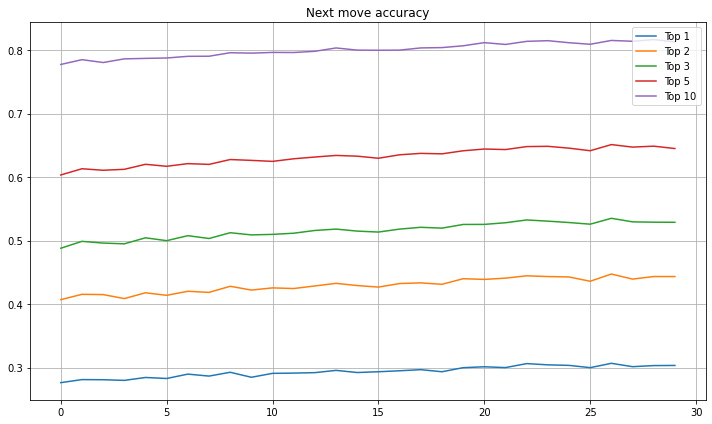

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Next move accuracy")
plt.plot(logs['next_move_accuracy'], label='Top 1')
plt.plot(logs['next_move_top_2_accuracy'], label='Top 2')
plt.plot(logs['next_move_top_3_accuracy'], label='Top 3')
plt.plot(logs['next_move_top_5_accuracy'], label='Top 5')
plt.plot(logs['next_move_top_10_accuracy'], label='Top 10')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()